<a href="https://colab.research.google.com/github/shreya-13-04/SVM-Text-Categorization/blob/main/Text_and_Hypertext_Categorization_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


** Load Dataset**

In [3]:
from sklearn.datasets import fetch_20newsgroups

categories = ['rec.sport.hockey', 'sci.med']
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

df = pd.DataFrame({'text': data.data, 'label': data.target})
df.head()


,text,label
0,From: ad215@Freenet.carleton.ca (Rachel Holme)...,0
1,From: nhmas@gauss.med.harvard.edu (Mark Shneyd...,0
2,From: farenebt@logic.camp.clarkson.edu (Droopy...,0
3,From: LMARSHA@cms.cc.wayne.edu (Laurie Marshal...,0
4,From: rousseaua@immunex.com\nSubject: Re: Lact...,1


**Preprocessing + Vectorization**

In [4]:

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['label']


**Train-Test Split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train SVM Model**

In [6]:
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

**Evaluation**

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9949748743718593
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       202
           1       0.99      1.00      0.99       196

    accuracy                           0.99       398
   macro avg       0.99      1.00      0.99       398
weighted avg       1.00      0.99      0.99       398

Confusion Matrix:
 [[200   2]
 [  0 196]]


**Threshold-Based Classification**

In [8]:
probs = model.predict_proba(X_test)[:, 1]
threshold = 0.6

pred_thresholded = (probs > threshold).astype(int)

print("Thresholded Accuracy:", accuracy_score(y_test, pred_thresholded))


Thresholded Accuracy: 0.992462311557789


**Sample Input**

In [9]:

sample_text = ["The new AI model has outperformed previous benchmarks in natural language understanding."]


sample_vector = vectorizer.transform(sample_text)

predicted_class = model.predict(sample_vector)[0]
predicted_prob = model.predict_proba(sample_vector)[0]

class_names = data.target_names

print("Sample Text:", sample_text[0])
print("Predicted Category:", class_names[predicted_class])
print("Confidence Scores:", predicted_prob)


Sample Text: The new AI model has outperformed previous benchmarks in natural language understanding.
Predicted Category: sci.med
Confidence Scores: [0.07790809 0.92209191]


**Visualize the Output**

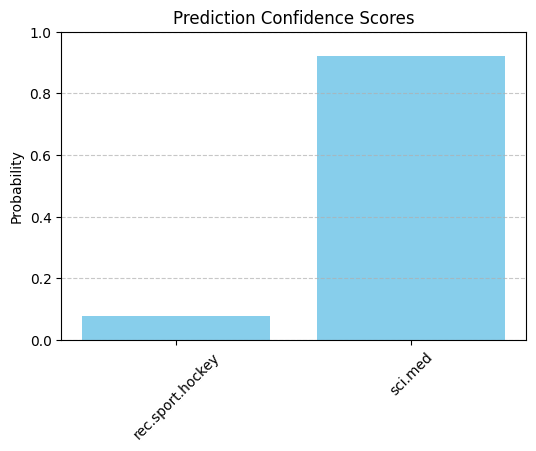

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
plt.bar(class_names, predicted_prob, color='skyblue')
plt.title('Prediction Confidence Scores')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
